In [136]:
import cv2
import glob
import tensorflow as tf
import keras
import os
from tensorflow.keras.utils import to_categorical
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
np.random.seed(13)
import warnings
warnings.filterwarnings('ignore')

In [137]:
import numpy as np


In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
df_train_X=pd.read_csv('/content/drive/MyDrive/project/X_train.csv',sep=',', index_col=0)
df_train_y=pd.read_csv('/content/drive/MyDrive/project/y_train.csv',sep=',', index_col=0)
df_val_X=pd.read_csv('/content/drive/MyDrive/project/X_test.csv',sep=',', index_col=0)
df_val_y=pd.read_csv('/content/drive/MyDrive/project/y_test.csv',sep=',', index_col=0)


In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Division de la bd
x_train,x_test,y_train,y_test=train_test_split(df_train_X,df_train_y,test_size=0.3,random_state=0)
# Sur-échantillonnage
from imblearn.over_sampling import RandomOverSampler
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(x_train, y_train)
x_rtest, y_rtest = rOs.fit_resample(x_test, y_test)

In [141]:
X_train=np.asarray(X_ro)
y_train=np.asarray(y_ro)
X_test=np.asarray(x_rtest)
y_test=np.asarray(y_rtest)


In [142]:
X_train.shape

(22360, 1024)

In [143]:
y_train.shape

(22360, 1)

In [144]:
X_test.shape

(9795, 1024)

In [145]:
y_test.shape

(9795, 1)

In [146]:
X_train=X_train.reshape(22360, 32,32,1)

In [147]:
y_train=y_train.reshape(22360,1)

In [148]:
X_test=X_test.reshape(9795, 32,32,1)

In [149]:
y_test=y_test.reshape(9795,1)

In [150]:
X,y = rOs.fit_resample(df_val_X,df_val_y)

In [151]:
X.shape

(8040, 1024)

In [152]:
y.shape

(8040, 1)

In [153]:
X_val=np.asarray(X)
y_val=np.asarray(y)

In [154]:
X_val=X_val.reshape(8040, 32,32,1)
y_val=y_val.reshape(8040,1)

In [155]:
from skimage.transform import resize
X_train=resize(X_train,(22360,32,32,1))
X_test=resize(X_test,(9795,32,32,1))
X_val=resize(X_val,(8040,32,32,1))

In [156]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.models import load_model
from PIL import Image


In [157]:
module =Sequential()


In [158]:
module.add(Conv2D(64,3,input_shape=(32,32,1)))
module.add(Activation('relu'))
module.add(MaxPooling2D(pool_size=(2,2)))

In [159]:
module.add(Flatten())


In [160]:
module.add(Dense(200))
module.add(Dense(5))
module.add(Activation('softmax'))
module.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",metrics=['sparse_categorical_accuracy'])

In [161]:
module.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        640       
                                                                 
 activation_2 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_2 (Dense)             (None, 200)               2880200   
                                                                 
 dense_3 (Dense)             (None, 5)                 1005      
                                                      

In [162]:
module.fit(X_train,y_train,batch_size=32,epochs=3)

Epoch 1/3
699/699 [==============================] - 34s 48ms/step - loss: 1.7278 - sparse_categorical_accuracy: 0.2346
Epoch 2/3
699/699 [==============================] - 29s 41ms/step - loss: 1.4880 - sparse_categorical_accuracy: 0.4273
Epoch 3/3
699/699 [==============================] - 29s 41ms/step - loss: 0.9003 - sparse_categorical_accuracy: 0.6730


In [163]:
test_loss,test_accuracy=module.evaluate(X_test,y_test)

307/307 [==============================] - 3s 10ms/step - loss: 0.7511 - sparse_categorical_accuracy: 0.7579


In [164]:
test_loss,test_accuracy=module.evaluate(X_val,y_val)

252/252 [==============================] - 2s 10ms/step - loss: 1.1774 - sparse_categorical_accuracy: 0.5974


In [166]:
module.fit(X_train,y_train,batch_size=32,epochs=1)

699/699 [==============================] - 29s 41ms/step - loss: 0.6504 - sparse_categorical_accuracy: 0.7708


In [167]:
test_loss,test_accuracy=module.evaluate(X_test,y_test)


307/307 [==============================] - 3s 10ms/step - loss: 0.5830 - sparse_categorical_accuracy: 0.7863


In [168]:
test_loss,test_accuracy=module.evaluate(X_val,y_val)


252/252 [==============================] - 3s 10ms/step - loss: 1.0621 - sparse_categorical_accuracy: 0.6361


In [171]:
module.save('/content/drive/MyDrive/tfmodel4.lt')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tfmodel4.lt/assets


In [175]:
del module

In [176]:
module = load_model('/content/drive/MyDrive/tfmodel4.lt')

In [177]:
test_loss,test_accuracy=module.evaluate(X_val,y_val)


252/252 [==============================] - 4s 15ms/step - loss: 1.0621 - sparse_categorical_accuracy: 0.6361


In [178]:
file = "/content/drive/MyDrive/tfmodel4.lt"
tf.saved_model.save(module, file)
converter = tf.lite.TFLiteConverter.from_saved_model(file)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tfmodel4.lt/assets


In [179]:
import pathlib
tflite_model_file = pathlib.Path('/content/drive/MyDrive/model4.tflite')
tflite_model_file.write_bytes(tflite_model)

11529008

In [180]:
tflite_model='/content/drive/MyDrive/model4.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model)
interpreter.allocate_tensors()

In [181]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [182]:
input_details

[{'dtype': numpy.float32,
  'index': 0,
  'name': 'serving_default_conv2d_1_input:0',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([ 1, 32, 32,  1], dtype=int32),
  'shape_signature': array([-1, 32, 32,  1], dtype=int32),
  'sparsity_parameters': {}}]

In [183]:
output_details

[{'dtype': numpy.float32,
  'index': 12,
  'name': 'StatefulPartitionedCall:0',
  'quantization': (0.0, 0),
  'quantization_parameters': {'quantized_dimension': 0,
   'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32)},
  'shape': array([1, 5], dtype=int32),
  'shape_signature': array([-1,  5], dtype=int32),
  'sparsity_parameters': {}}]

In [184]:
from google.colab.patches import cv2_imshow

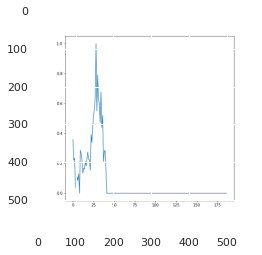

In [185]:
b="/content/drive/MyDrive/test/2/31.png"
img=plt.imread(b)
plt.imshow(img)

In [186]:
from skimage import color
from skimage.transform import resize
resized_image = resize(img,(32,32,3))
imgGray = color.rgb2gray(resized_image)

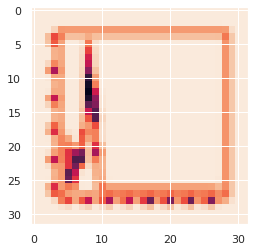

In [187]:
plt.imshow(imgGray)

In [188]:
X_train.shape

(22360, 32, 32, 1)

In [189]:
imgGray.shape

(32, 32)

In [190]:
g=imgGray.reshape((1,32,32,1))

In [191]:
to_predict = np.array(np.array(g),dtype='float32')
interpreter.set_tensor(input_details[0]['index'], to_predict)
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])
print(tflite_results)

[[7.8095468e-03 3.2197237e-02 6.8997997e-01 5.8053754e-04 2.6943266e-01]]


In [192]:
list=[0,1,2,3,4]
X=tflite_results
for i in range(5):
  for j in range(5):
    if X[0][list[i]] > X[0][list[j]]:
      temp=list[i]
      list[i]=list[j]
      list[j]=temp


list

[2, 4, 1, 0, 3]

In [193]:
class_list=["Class 0","Class 1","Class 2","Class 3","Class 4"]

In [194]:
for i in range(5):
  print(class_list[list[i]]," sa predictions ",round(tflite_results[0][list[i]]*100 , 2),"%")

Class 2  sa predictions  69.0 %
Class 4  sa predictions  26.94 %
Class 1  sa predictions  3.22 %
Class 0  sa predictions  0.78 %
Class 3  sa predictions  0.06 %
